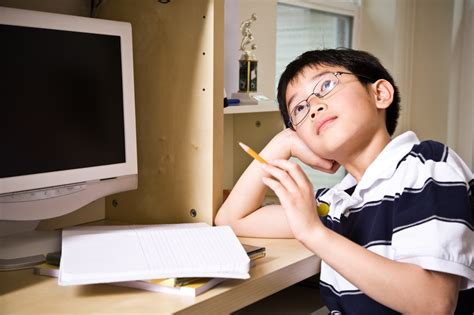

#ABOUT THE DATASET

Description: This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.

---



---


"This dataset was created for educational purposes and was generated, not collected from actual data sources."

#USAGE

This dataset could be used for various research questions related to education, such as examining the impact of parental education or test preparation courses on student performance. It could also be used to develop machine learning models to predict student performance based on demographic and other factors.

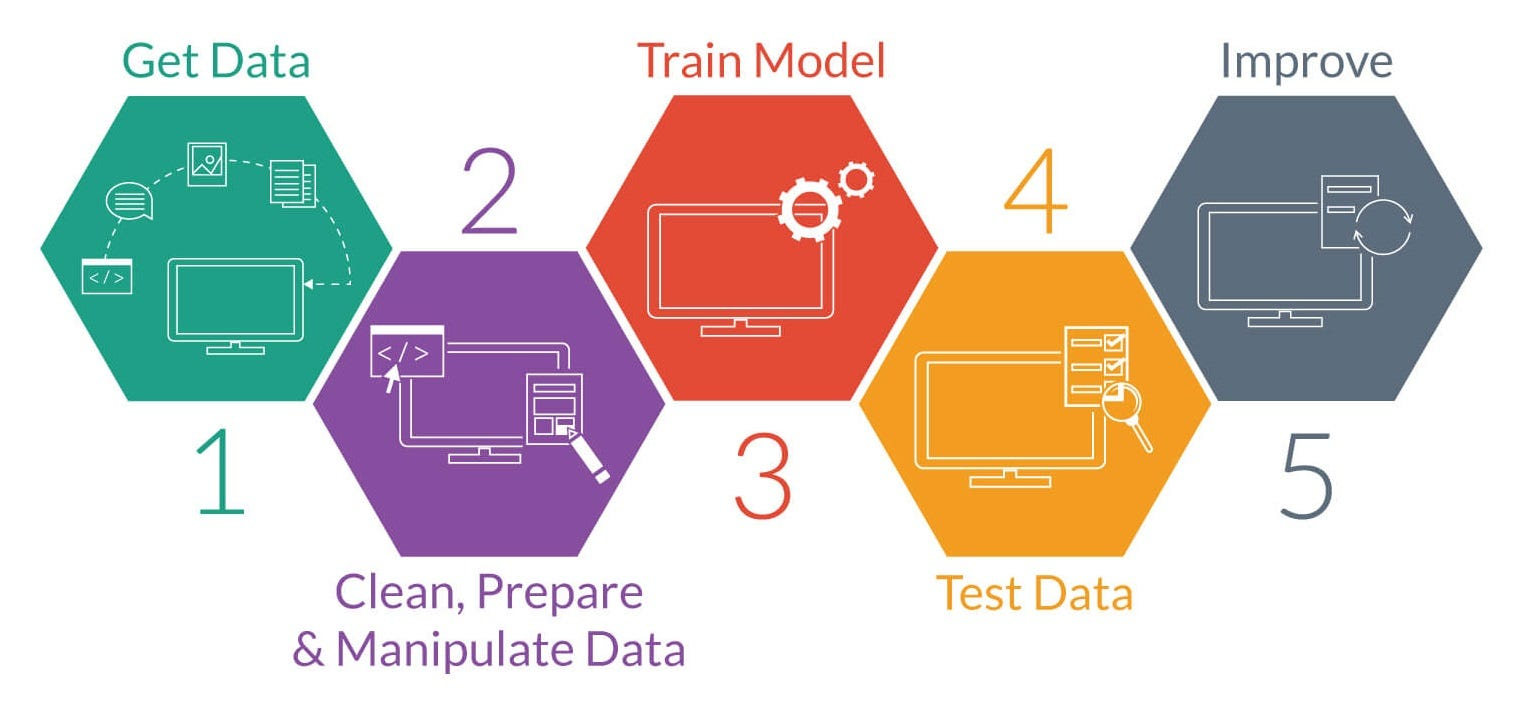

# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data 
* 3.Data prepration and Data Transformation
    * 1.Dealing with missing value
    * 2.Inconsistent value: Replace all transformation with consistent values 
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion 
        * 2.Classification
            * 1.Apply Logistic Regression
            * 2.Apply Decision Tree
            * 3.Evalaute Between Logistic and Decision Tree Which is the better model

#Importing The Libraries




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

#Importing The dataset

In [2]:
df=pd.read_csv('/content/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


#Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()
#describe the attributes of each column

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#creating a new variable  "totalscore"

In [5]:
df['totalscore']=(df['math score']+df['reading score']+df['writing score'])
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254


In [6]:
df['percentage']=(df['totalscore']/300)*100
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore,percentage
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


<Axes: >

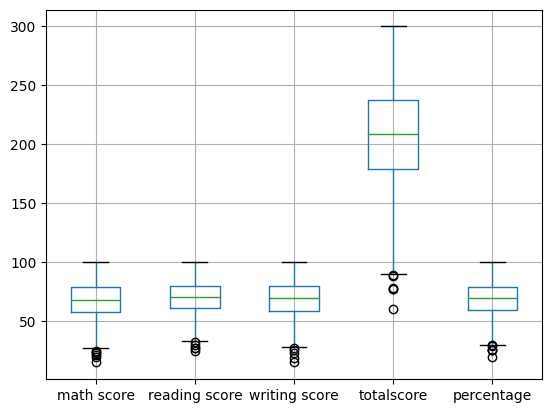

In [7]:
df.boxplot()

#Removing The Outliers

In [8]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range
    

In [9]:
low_leadtime,high_leadtime=remove_outlier(df['math score'])
df['math score']=np.where(df['math score']>high_leadtime,high_leadtime,df['math score'])
df['math score']=np.where(df['math score']<low_leadtime,low_leadtime,df['math score'])

In [10]:
low_leadtime,high_leadtime=remove_outlier(df['reading score'])
df['reading score']=np.where(df['reading score']>high_leadtime,high_leadtime,df['reading score'])
df['reading score']=np.where(df['reading score']<low_leadtime,low_leadtime,df['reading score'])

In [11]:

low_leadtime,high_leadtime=remove_outlier(df['writing score'])
df['writing score']=np.where(df['writing score']>high_leadtime,high_leadtime,df['writing score'])
df['writing score']=np.where(df['writing score']<low_leadtime,low_leadtime,df['writing score'])

In [12]:
low_leadtime,high_leadtime=remove_outlier(df['totalscore'])
df['totalscore']=np.where(df['totalscore']>high_leadtime,high_leadtime,df['totalscore'])
df['totalscore']=np.where(df['totalscore']<low_leadtime,low_leadtime,df['totalscore'])

In [13]:
low_leadtime,high_leadtime=remove_outlier(df['percentage'])
df['percentage']=np.where(df['percentage']>high_leadtime,high_leadtime,df['percentage'])
df['percentage']=np.where(df['percentage']<low_leadtime,low_leadtime,df['percentage'])

<Axes: >

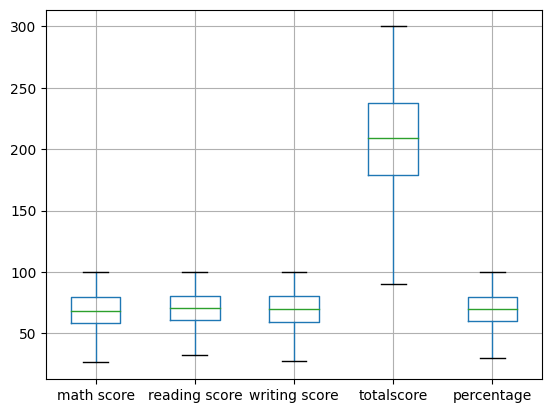

In [14]:
df.boxplot()

#Distribution of Percentage

<Axes: ylabel='Frequency'>

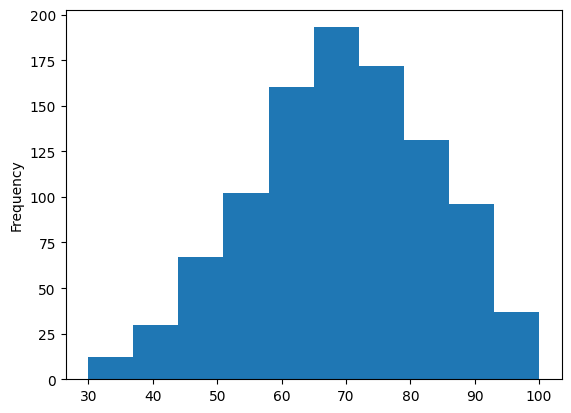

In [15]:
df['percentage'].plot(kind='hist')

#Percentage into Fail & Pass

In [16]:
validation=pd.DataFrame(pd.cut(df['percentage'],2, labels=['fail','pass']))
validation.columns=['validation']
df=pd.concat([df,validation],axis=1)
print(validation)

    validation
0         pass
1         pass
2         pass
3         pass
4         pass
..         ...
995       pass
996       pass
997       pass
998       pass
999       fail

[1000 rows x 1 columns]


In [17]:
res=pd.get_dummies(df['validation'],drop_first=True)
res.columns=['result']
df=pd.concat([df,res],axis=1)

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore,percentage,validation,result
0,female,group D,some college,standard,completed,59.0,70.0,78.0,207.0,69.000000,pass,1
1,male,group D,associate's degree,standard,none,96.0,93.0,87.0,276.0,92.000000,pass,1
2,female,group D,some college,free/reduced,none,57.0,76.0,77.0,210.0,70.000000,pass,1
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0,203.0,67.666667,pass,1
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0,254.0,84.666667,pass,1


#Total No Of Students Pass / Fail

pass    629
fail    371
Name: validation, dtype: int64

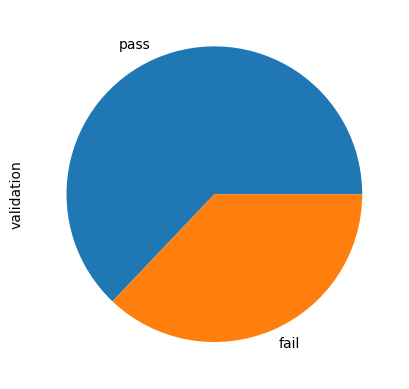

In [19]:
df['validation'].value_counts().plot(kind='pie')
df['validation'].value_counts()
#total 63 percentage of students have passed 
#and 37 perventage of students have failed

<Axes: ylabel='result'>

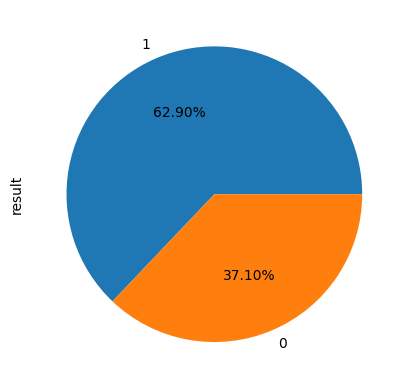

In [20]:
df['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')

#Relation Between categorical values dependent variable

gender  validation
female  pass          0.668699
        fail          0.331301
male    pass          0.590551
        fail          0.409449
Name: validation, dtype: float64


<Axes: xlabel='gender', ylabel='result'>

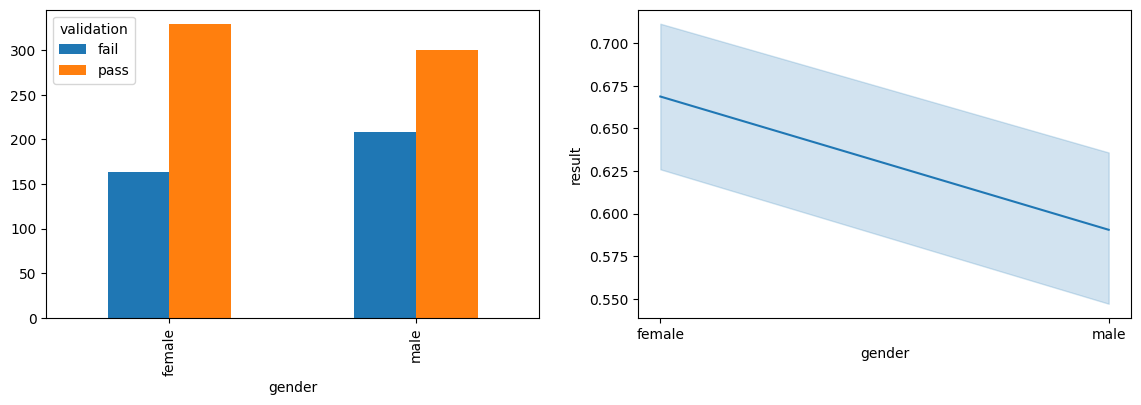

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.gender,df.validation).plot(kind="bar",ax=ax1)
s = df.groupby(['gender'])['validation'].value_counts(normalize=True)
print(s)
sns.lineplot(
    x="gender", 
    y="result",
    data=df,ax=ax2)

race/ethnicity  validation
group A         pass          0.645570
                fail          0.354430
group B         pass          0.535354
                fail          0.464646
group C         pass          0.591331
                fail          0.408669
group D         pass          0.657588
                fail          0.342412
group E         pass          0.783217
                fail          0.216783
Name: validation, dtype: float64


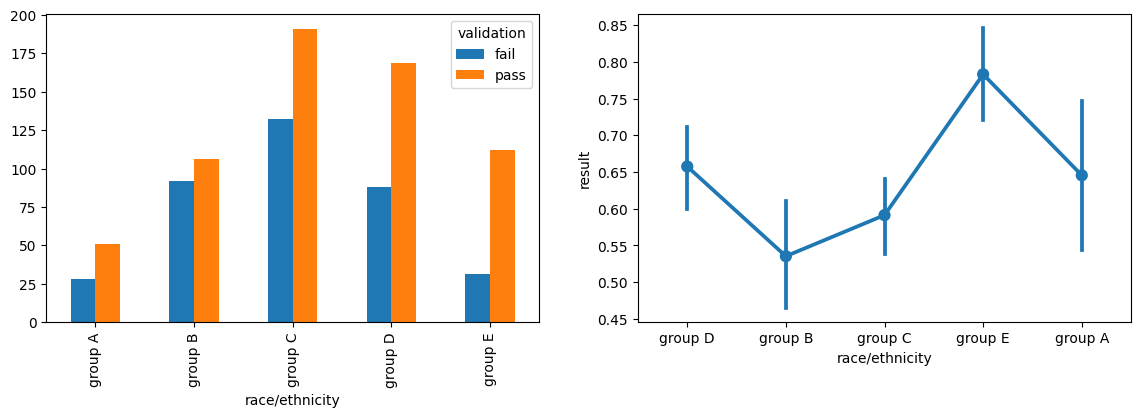

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df['race/ethnicity'],df['validation']).plot(kind="bar",ax=ax1)
s = df.groupby(['race/ethnicity'])['validation'].value_counts(normalize=True)
print(s)
#the quartiles displayed by a box plot, a violin plot draws a Kernel density estimate curve that shows probabilities of observations at different areas.
sns.pointplot(
    x='race/ethnicity', 
    y='result', 
    data=df, 
    ax=ax2);

parental level of education  validation
associate's degree           pass          0.715686
                             fail          0.284314
bachelor's degree            pass          0.685714
                             fail          0.314286
high school                  pass          0.567442
                             fail          0.432558
master's degree              pass          0.720000
                             fail          0.280000
some college                 pass          0.633929
                             fail          0.366071
some high school             pass          0.525424
                             fail          0.474576
Name: validation, dtype: float64


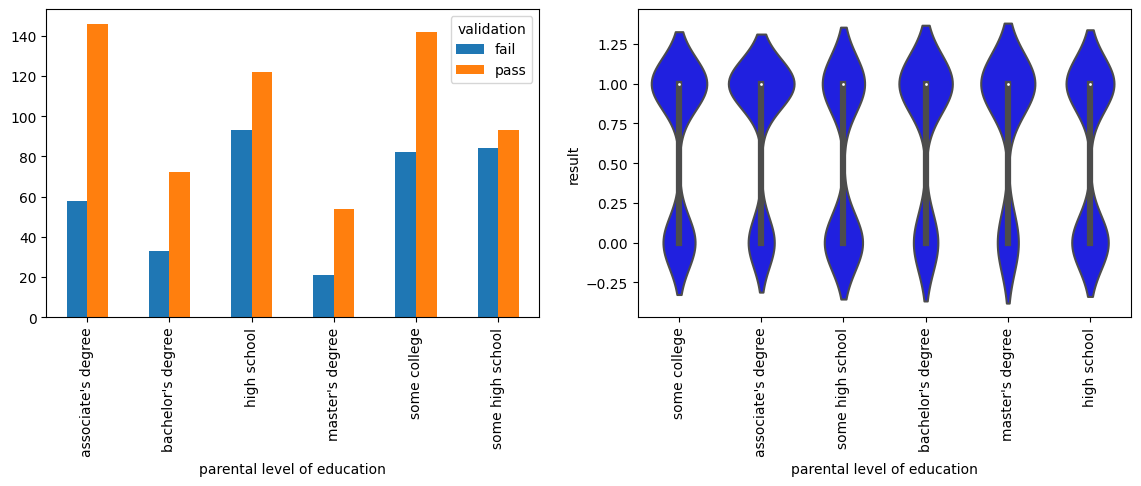

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df['parental level of education'],df['validation']).plot(kind="bar",ax=ax1)
s = df.groupby(['parental level of education'])['validation'].value_counts(normalize=True)
print(s)
#the quartiles displayed by a box plot, a violin plot draws a Kernel density estimate curve that shows probabilities of observations at different areas.
sns.violinplot(
    x='parental level of education', 
    y='result', 
    data=df, 
    color='blue')
plt.xticks(rotation=90)
plt.show()

lunch         validation
free/reduced  fail          0.532353
              pass          0.467647
standard      pass          0.712121
              fail          0.287879
Name: validation, dtype: float64


<Axes: xlabel='lunch', ylabel='result'>

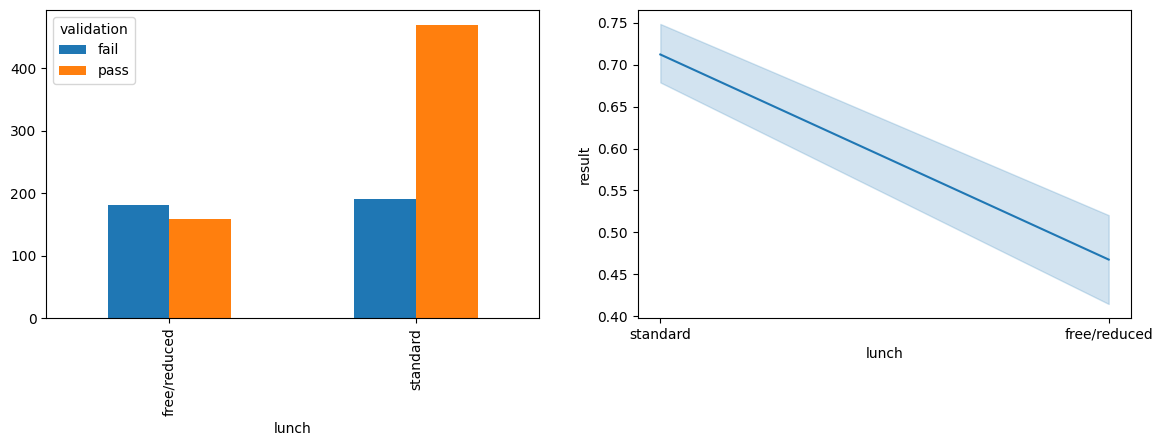

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df['lunch'],df['validation']).plot(kind="bar",ax=ax1)
s = df.groupby(['lunch'])['validation'].value_counts(normalize=True)
print(s)
sns.lineplot(
    x="lunch", 
    y="result",
    data=df,ax=ax2)

test preparation course  validation
completed                pass          0.752907
                         fail          0.247093
none                     pass          0.564024
                         fail          0.435976
Name: validation, dtype: float64


<Axes: xlabel='test preparation course', ylabel='result'>

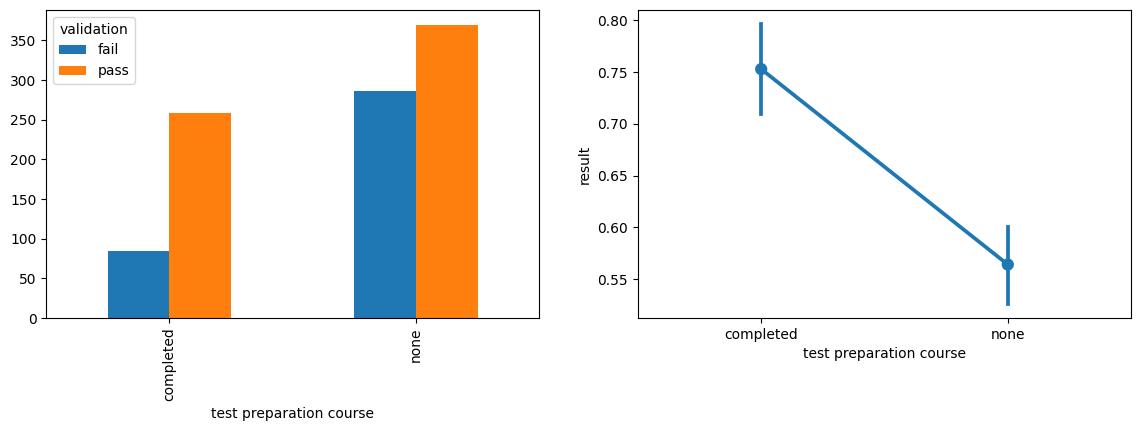

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df['test preparation course'],df['validation']).plot(kind="bar",ax=ax1)
s = df.groupby(['test preparation course'])['validation'].value_counts(normalize=True)
print(s)
sns.pointplot(
    x='test preparation course', 
    y='result', 
    data=df,ax=ax2)



array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>,
        <Axes: title={'center': 'totalscore'}>],
       [<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'result'}>]], dtype=object)

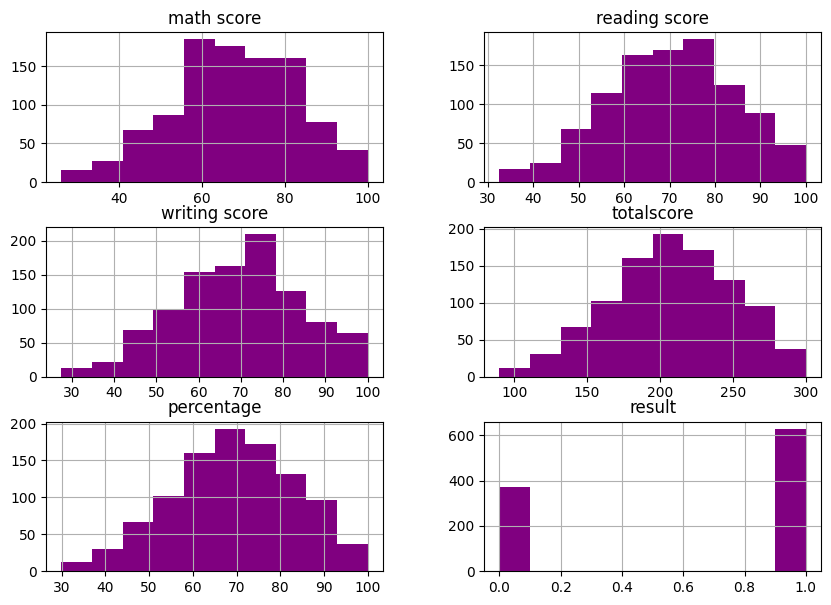

In [41]:
df.hist(figsize=(10,7),color='purple')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   float64 
 6   reading score                1000 non-null   float64 
 7   writing score                1000 non-null   float64 
 8   totalscore                   1000 non-null   float64 
 9   percentage                   1000 non-null   float64 
 10  validation                   1000 non-null   category
 11  result                       1000 non-null   uint8   
dtypes: category(1), float64(5), object(5), uint8(1)
memory usage: 8

#Univariate Analysis

In [ ]:
df.describe()
#describe the attributes of each column

,math score,reading score,writing score,totalscore,percentage,result
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.838750,70.403500,69.167500,207.402250,69.134083,0.629000
std,15.164599,14.045095,14.940998,41.870418,13.956806,0.483314
min,26.125000,32.500000,27.500000,89.875000,29.958333,0.000000
25%,58.000000,61.000000,59.000000,178.750000,59.583333,0.000000
50%,68.000000,70.500000,70.000000,209.000000,69.666667,1.000000
75%,79.250000,80.000000,80.000000,238.000000,79.333333,1.000000
max,100.000000,100.000000,100.000000,300.000000,100.000000,1.000000


In [ ]:
df.skew()

<ipython-input-40-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


math score      -0.240765
reading score   -0.151702
writing score   -0.170530
totalscore      -0.212956
percentage      -0.212956
result          -0.534884
dtype: float64

#Bivariate Analysis

In [ ]:
df.corr()

,math score,reading score,writing score,totalscore,percentage,result
math score,1.000000,0.811045,0.789425,0.916423,0.916423,0.739617
reading score,0.811045,1.000000,0.948499,0.967945,0.967945,0.766390
writing score,0.789425,0.948499,1.000000,0.961107,0.961107,0.772756
totalscore,0.916423,0.967945,0.961107,1.000000,1.000000,0.800936
percentage,0.916423,0.967945,0.961107,1.000000,1.000000,0.800936
result,0.739617,0.766390,0.772756,0.800936,0.800936,1.000000


<ipython-input-35-a9ff8152da49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

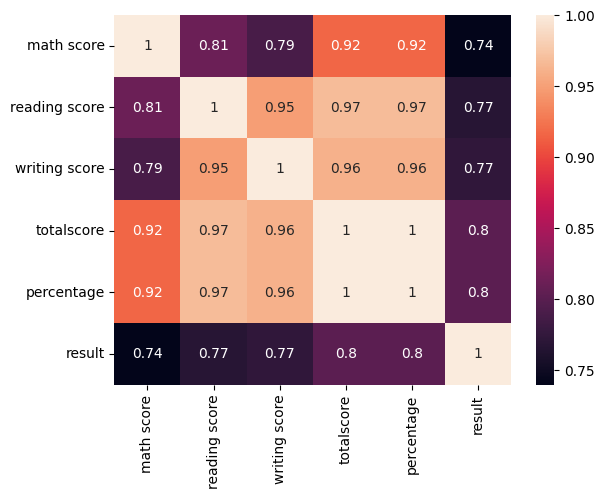

In [35]:
sns.heatmap(df.corr(),annot=True)
#add anotation

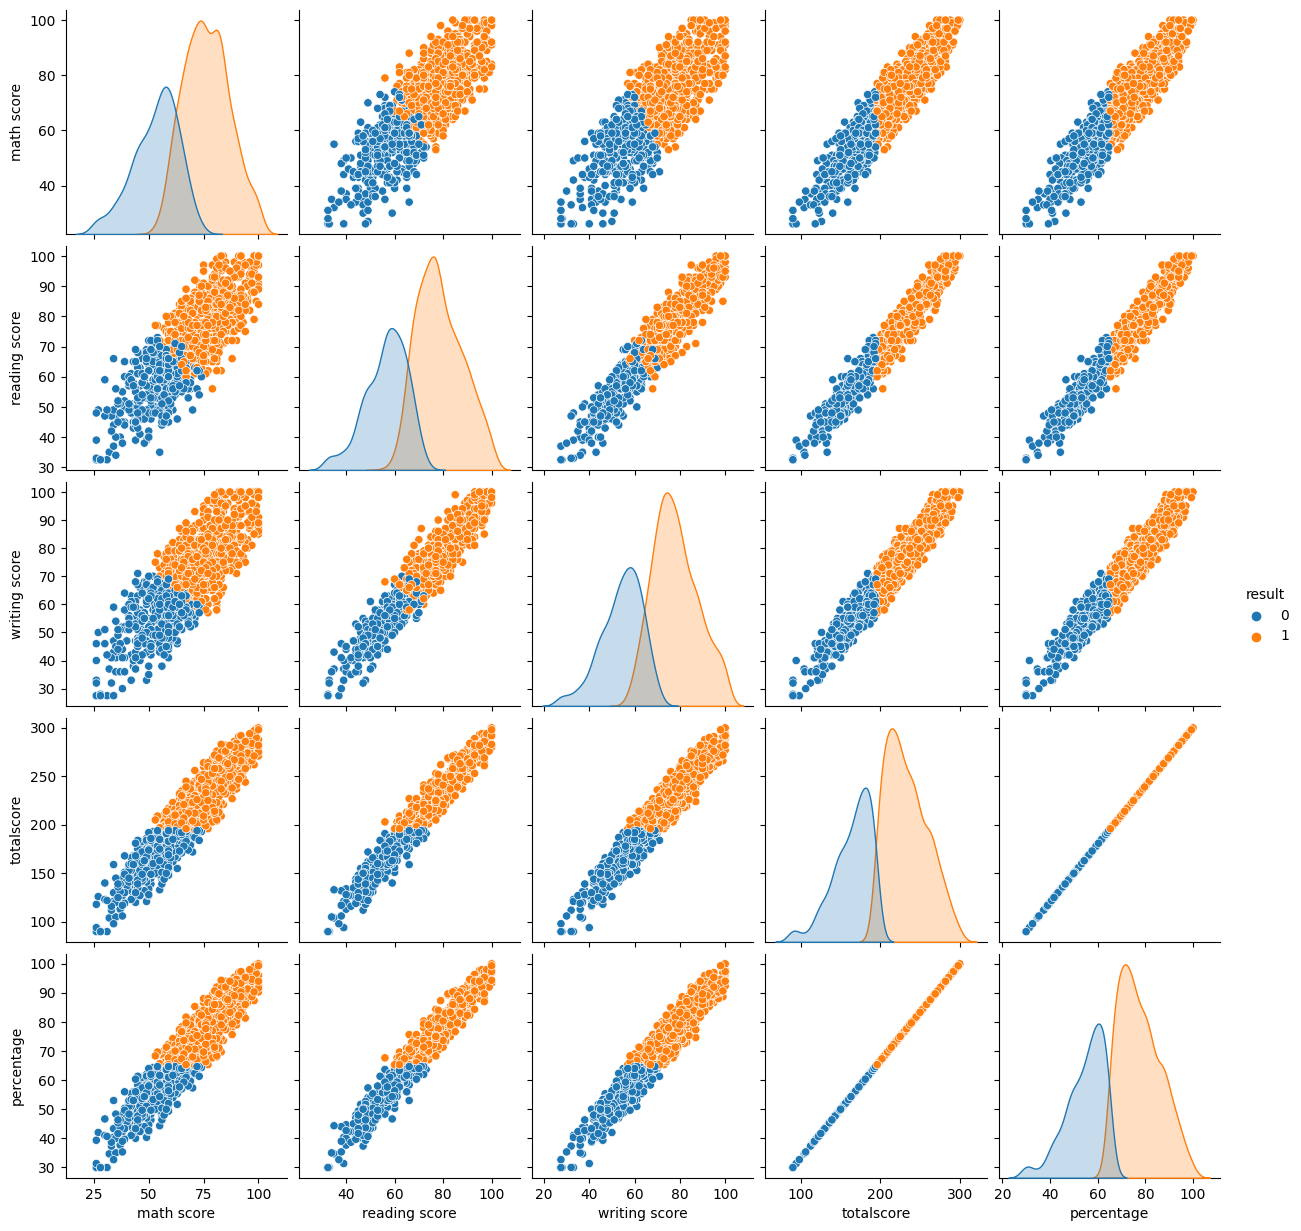

In [39]:
sns.pairplot(df,hue='result')

# Performing Chi _Sq test

In [ ]:
def chi_sq(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_=chi2_contingency(table)
  if p<=0.05:
    print('accept alternate hypothesis',round(p,2))
  else:
    print("accept null hypothesis",round(p,2))
  return table



1.   null hypo=variables are independent
2.   alternate= variables are dependent




In [ ]:
chi_sq(df['gender'],df['result'])
#entropy is low
#dependent

accept alternate hypothesis 0.01


result,0,1
gender,,
female,163,329
male,208,300


In [ ]:
chi_sq(df['race/ethnicity'],df['result'])
#p value is 0.0
#dependent

accept alternate hypothesis 0.0


result,0,1
race/ethnicity,,
group A,28,51
group B,92,106
group C,132,191
group D,88,169
group E,31,112


In [ ]:
chi_sq(df['parental level of education'],df['result'])

accept alternate hypothesis 0.0


result,0,1
parental level of education,,
associate's degree,58,146
bachelor's degree,33,72
high school,93,122
master's degree,21,54
some college,82,142
some high school,84,93


In [ ]:
chi_sq(df['lunch'],df['result'])

accept alternate hypothesis 0.0


result,0,1
lunch,,
free/reduced,181,159
standard,190,470


In [ ]:

chi_sq(df['test preparation course'],df['result'])

accept alternate hypothesis 0.0


result,0,1
test preparation course,,
completed,85,259
none,286,370


In [ ]:
chi_sq(df['math score'],df['result'])

accept alternate hypothesis 0.0


result,0,1
math score,,
26.125,6,0
27.000,1,0
28.000,2,0
30.000,2,0
31.000,2,0
...,...,...
96.000,0,6
97.000,0,4
98.000,0,5


#Encoding The Data

The get_dummies function is used to convert categorical variables into dummy.....get_dummies is the option to go with as it would give equal weightage to the data in the columns

1.   get_dummies is the option to go with as it would give equal weightage to the categorical variables
2.   LabelEncoder is used when the categorical variables are ordinal (raniking problems )

In [ ]:
gen=pd.get_dummies(df['gender'],drop_first=True)
gen.columns=['Gender']
df=pd.concat([df,gen],axis=1)
df.drop('gender',axis=1,inplace=True)

if we use label encoder there are 5 group of races - (which gets turned into rank based categories) which is not good for the model .

In [ ]:
race=pd.get_dummies(df['race/ethnicity'],drop_first=False)
df=pd.concat([df,race],axis=1)
df.drop('race/ethnicity',axis=1,inplace=True)

In [ ]:
p_edu=pd.get_dummies(df['parental level of education'],drop_first=False)
df=pd.concat([df,p_edu],axis=1)
df.drop('parental level of education',axis=1,inplace=True)

In [ ]:
lunch=pd.get_dummies(df['lunch'],drop_first=False)
df=pd.concat([df,lunch],axis=1)
df.drop('lunch',axis=1,inplace=True)

In [ ]:
t_prep=pd.get_dummies(df['test preparation course'],drop_first=True)
t_prep.columns=['test_prep']
df=pd.concat([df,t_prep],axis=1)
df.drop('test preparation course',axis=1,inplace=True)


In [ ]:

df.head()

,math score,reading score,writing score,totalscore,percentage,validation,result,group A,group B,group C,...,Gender,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,test_prep
0,59.0,70.0,78.0,207.0,69.000000,pass,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,96.0,93.0,87.0,276.0,92.000000,pass,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
2,57.0,76.0,77.0,210.0,70.000000,pass,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,70.0,70.0,63.0,203.0,67.666667,pass,1,0,1,0,...,1,0,0,0,0,1,0,1,0,1
4,83.0,85.0,86.0,254.0,84.666667,pass,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   math score          1000 non-null   float64 
 1   reading score       1000 non-null   float64 
 2   writing score       1000 non-null   float64 
 3   totalscore          1000 non-null   float64 
 4   percentage          1000 non-null   float64 
 5   validation          1000 non-null   category
 6   result              1000 non-null   uint8   
 7   group A             1000 non-null   uint8   
 8   group B             1000 non-null   uint8   
 9   group C             1000 non-null   uint8   
 10  group D             1000 non-null   uint8   
 11  group E             1000 non-null   uint8   
 12  Gender              1000 non-null   uint8   
 13  associate's degree  1000 non-null   uint8   
 14  bachelor's degree   1000 non-null   uint8   
 15  high school         1000 non-null   uin

#Train Test Split

In [ ]:
x=df.drop(['result','validation'],axis=1)
y=df['result']

#standard scaling

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [ ]:
print(x_train_scal.shape)
print(x_test_scal.shape)
print(y_test.shape)
print(y_train.shape)

(800, 20)
(200, 20)
(200,)
(800,)


#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score)
   print(cn_matrix)
   print(cla_report)

In [ ]:
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.9925
[[303   3]
 [  3 491]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       494

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [ ]:
acc_report(y_test,preds_ytest_lr)

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=2)
dtc.fit(x_train_scal,y_train)
preds_ytrain_dtc=dtc.predict(x_train_scal)
preds_ytest_dtc=dtc.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=20 ,max_depth=5 ,verbose=1)
rf.fit(x_train_scal,y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [ ]:

acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train_scal,y_train)
preds_ytrain_knn=knn.predict(x_train_scal)
preds_ytest_knn=knn.predict(x_test_scal)
acc_report(y_train,preds_ytrain_knn)

accuracy:: 0.94125
[[270  36]
 [ 11 483]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       306
           1       0.93      0.98      0.95       494

    accuracy                           0.94       800
   macro avg       0.95      0.93      0.94       800
weighted avg       0.94      0.94      0.94       800



In [ ]:

acc_report(y_test,preds_ytest_knn)

accuracy:: 0.94
[[ 57   8]
 [  4 131]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        65
           1       0.94      0.97      0.96       135

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(x_train_scal,y_train)
preds_ada_train=ada.predict(x_train_scal)
preds_ada_test=ada.predict(x_test_scal)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#support vector machine

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=4)
svc.fit(x_train_scal,y_train)
svc_preds_train=svc.predict(x_train_scal)
svc_preds_test=svc.predict(x_test_scal)


In [ ]:
acc_report(y_train,svc_preds_train)

accuracy:: 0.915
[[239  67]
 [  1 493]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       306
           1       0.88      1.00      0.94       494

    accuracy                           0.92       800
   macro avg       0.94      0.89      0.91       800
weighted avg       0.92      0.92      0.91       800



In [ ]:
acc_report(y_test,svc_preds_test)

accuracy:: 0.905
[[ 48  17]
 [  2 133]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.83        65
           1       0.89      0.99      0.93       135

    accuracy                           0.91       200
   macro avg       0.92      0.86      0.88       200
weighted avg       0.91      0.91      0.90       200



#GaussianNB

In [ ]:
  from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gb_preds_train=gb.predict(x_train)
gb_preds_test=gb.predict(x_test)

In [ ]:
acc_report(y_train,gb_preds_train)

accuracy:: 0.9675
[[303   3]
 [ 23 471]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       306
           1       0.99      0.95      0.97       494

    accuracy                           0.97       800
   macro avg       0.96      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [ ]:
acc_report(y_test,gb_preds_test)

accuracy:: 0.96
[[ 62   3]
 [  5 130]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.98      0.96      0.97       135

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200



#training the data using smote

In [ ]:
from imblearn.over_sampling import SMOTE
smp=SMOTE()

In [ ]:
x_smote,y_smote=smp.fit_resample(x,y)

In [ ]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)


#logistic regression

In [ ]:
lr.fit(x_sm_train,y_sm_train) #Training the model


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
preds_ytrain_lr=lr.predict(x_sm_train)
preds_ytest_lr=lr.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_lr)

accuracy:: 0.9811133200795229
[[500  11]
 [  8 487]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       511
           1       0.98      0.98      0.98       495

    accuracy                           0.98      1006
   macro avg       0.98      0.98      0.98      1006
weighted avg       0.98      0.98      0.98      1006



In [ ]:
acc_report(y_sm_test,preds_ytest_lr)


accuracy:: 0.9603174603174603
[[110   8]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       118
           1       0.94      0.99      0.96       134

    accuracy                           0.96       252
   macro avg       0.96      0.96      0.96       252
weighted avg       0.96      0.96      0.96       252



#decision tree

In [ ]:
dtc.fit(x_sm_train,y_sm_train)
preds_ytrain_dtc=dtc.predict(x_sm_train)
preds_ytest_dtc=dtc.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_dtc)
acc_report(y_sm_test,preds_ytest_dtc)

accuracy:: 1.0
[[511   0]
 [  0 495]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1006
   macro avg       1.00      1.00      1.00      1006
weighted avg       1.00      1.00      1.00      1006

accuracy:: 1.0
[[118   0]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       134

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



#random forest

In [ ]:
rf.fit(x_sm_train,y_sm_train)
preds_ytrain_rf=rf.predict(x_sm_train)
preds_ytest_rf=rf.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_rf)
acc_report(y_sm_test,preds_ytest_rf)

accuracy:: 1.0
[[511   0]
 [  0 495]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1006
   macro avg       1.00      1.00      1.00      1006
weighted avg       1.00      1.00      1.00      1006

accuracy:: 1.0
[[118   0]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       134

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


#gradient boosting

In [ ]:
gb.fit(x_sm_train,y_sm_train)
preds_ytrain_gb=gb.predict(x_sm_train)
preds_ytest_gb=gb.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_gb)
acc_report(y_sm_test,preds_ytest_gb)

accuracy:: 0.9592445328031809
[[498  13]
 [ 28 467]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       511
           1       0.97      0.94      0.96       495

    accuracy                           0.96      1006
   macro avg       0.96      0.96      0.96      1006
weighted avg       0.96      0.96      0.96      1006

accuracy:: 0.9761904761904762
[[114   4]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       118
           1       0.97      0.99      0.98       134

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252



#KNN

In [ ]:
knn.fit(x_sm_train,y_sm_train)
preds_ytrain_knn=knn.predict(x_sm_train)
preds_ytest_knn=knn.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_knn)
acc_report(y_sm_test,preds_ytest_knn)

accuracy:: 0.9950298210735586
[[510   1]
 [  4 491]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       511
           1       1.00      0.99      0.99       495

    accuracy                           1.00      1006
   macro avg       1.00      0.99      1.00      1006
weighted avg       1.00      1.00      1.00      1006

accuracy:: 0.996031746031746
[[118   0]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       1.00      0.99      1.00       134

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



#ada boosting

In [ ]:
ada.fit(x_sm_train,y_sm_train)
preds_ytrain_ada=ada.predict(x_sm_train)
preds_ytest_ada=ada.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_ada)
acc_report(y_sm_test,preds_ytest_ada)

accuracy:: 1.0
[[511   0]
 [  0 495]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1006
   macro avg       1.00      1.00      1.00      1006
weighted avg       1.00      1.00      1.00      1006

accuracy:: 1.0
[[118   0]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       134

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



#svc

In [ ]:
svc.fit(x_sm_train,y_sm_train)
preds_ytrain_svc=svc.predict(x_sm_train)
preds_ytest_svc=svc.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_svc)
acc_report(y_sm_test,preds_ytest_svc)

accuracy:: 0.9920477137176938
[[511   0]
 [  8 487]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       1.00      0.98      0.99       495

    accuracy                           0.99      1006
   macro avg       0.99      0.99      0.99      1006
weighted avg       0.99      0.99      0.99      1006

accuracy:: 0.996031746031746
[[118   0]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       1.00      0.99      1.00       134

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



#GaussianNB

In [ ]:
gb=GaussianNB()
gb.fit(x_sm_train,y_sm_train)
preds_ytrain_gb=gb.predict(x_sm_train)
preds_ytest_gb=gb.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_gb)
acc_report(y_sm_test,preds_ytest_gb)

accuracy:: 0.9592445328031809
[[498  13]
 [ 28 467]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       511
           1       0.97      0.94      0.96       495

    accuracy                           0.96      1006
   macro avg       0.96      0.96      0.96      1006
weighted avg       0.96      0.96      0.96      1006

accuracy:: 0.9761904761904762
[[114   4]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       118
           1       0.97      0.99      0.98       134

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252



#accuracy before smote  .............                  #after smote

1.   logistic regression 
               train=0.99                          train=0.98
               test=0.95                           test=0.96
              
2.   decision tree
               train=1.0                           train=1.0
               test=0.95                           test=1.0
3. random forest
               train=1.0                           train=1.0
               test=0.95                           test=1.0
4. gradient boosting
               train=1.0                           train=0.95
               test=0.95                           test=0.97
5. knn
               train=0.95                          train=0.99
               test=0.94                           test=0.99
6. ada boosting 
               train=1.0                           train=1.0
               test=0.95                           test=1.0
7. svc
               train=0.92                          train=0.99
               test=0.92                           test=0.99
8. gaussiaan naive bayes
               train=0.96                          train=0.95
               test=0.96                           test=0.97

#Conclusion::
we can conclude that "Ada Boosting" , "Decision Tree" , "RandomForest"
have high accuracy 
performs well comparing other models ........       
after using smote we can see there is a small significant improvements in th models